In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi as PI
from numpy import sin, cos, exp
from OFDM.channel import *
from OFDM.helper import *

In [2]:
K = 3
G = 2
N = 4
MU = 8

In [11]:
P = 1
pilotValue = 1
allCarriers = np.arange(9)
pilotCarriers = np.array([0,4,8])
dataCarriers = np.delete(allCarriers, pilotCarriers)
print ("allCarriers:\n", allCarriers)
print ("pilotCarriers:\n", pilotCarriers)
print ("dataCarriers:\n", dataCarriers)

allCarriers:
 [0 1 2 3 4 5 6 7 8]
pilotCarriers:
 [0 4 8]
dataCarriers:
 [1 2 3 5 6 7]


In [14]:
bits = np.array([0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1])
print(bits)
print(bits.size)

[0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1]
24


In [22]:
A = S2P(bits, 8, K)
print(A)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [1 0 1]
 [1 0 0]
 [1 1 1]]


In [6]:
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-3j,
    (0,0,1,0) : -3-3j,
    (0,0,1,1) : -3-3j,
    (0,1,0,0) : -3-3j,
    (0,1,0,1) : -3-3j,
    (0,1,1,0) : -3-3j,
    (0,1,1,1) : -3-3j,
    (1,0,0,0) : -3-3j,
    (1,0,0,1) : -3-3j,
    (1,0,1,0) : -3-3j,
    (1,0,1,1) : -3-3j,
    (1,1,0,0) : -3-3j,
    (1,1,0,1) : -3-3j,
    (1,1,1,0) : -3-3j,
    (1,1,1,1) : -3-3j,
}

In [7]:
B = Mapping(A, mapping_table)
print(B)

[ 1.-1.j  1.+1.j  1.-1.j -1.-1.j]


In [8]:
# B1 = OFDM_symbol(B, K, dataCarriers, pilotCarriers, pilotValue)

In [9]:
C = np.zeros(N, dtype=B.dtype)
C[1] = B[0]
C[2] = B[1]
C[6] = B[2]
C[7] = B[3]
print(C)

[ 0.+0.j  1.-1.j  1.+1.j  0.+0.j  0.+0.j  0.+0.j  1.-1.j -1.-1.j]


In [10]:
D = IFFT(C, N)
print(D)

[ 0.25-0.25j       -0.25+0.j         -0.25+0.25j        0.25+0.35355339j
  0.25+0.25j       -0.25+0.j         -0.25-0.25j        0.25-0.35355339j]


In [11]:
E = addCP(D, G)
print(E)

[ 0.25+0.25j       -0.25+0.j         -0.25-0.25j        0.25-0.35355339j
  0.25-0.25j       -0.25+0.j         -0.25+0.25j        0.25+0.35355339j
  0.25+0.25j       -0.25+0.j         -0.25-0.25j        0.25-0.35355339j]


In [13]:
F = P2S(E)
print(F)

[ 0.25+0.25j       -0.25+0.j         -0.25-0.25j        0.25-0.35355339j
  0.25-0.25j       -0.25+0.j         -0.25+0.25j        0.25+0.35355339j
  0.25+0.25j       -0.25+0.j         -0.25-0.25j        0.25-0.35355339j]


In [15]:
G1 = F.real
G2 = F.imag
print(G1)
print(G2)

[ 0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25]
[ 0.25        0.         -0.25       -0.35355339 -0.25        0.
  0.25        0.35355339  0.25        0.         -0.25       -0.35355339]


In [17]:
G1.size

12

In [21]:
x = t = np.arange(0, G1.size, 1)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


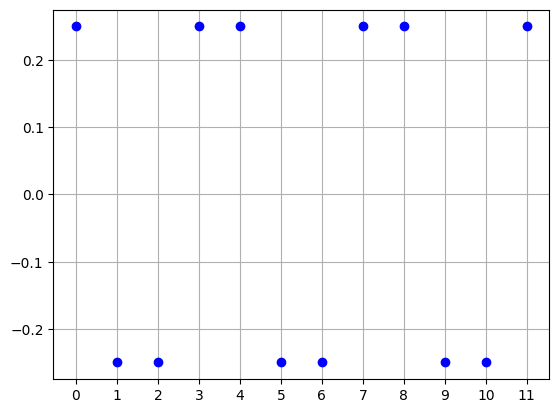

In [31]:
plt.plot(x,G1, 'bo')
plt.xticks(x)
plt.grid(True)
plt.show()

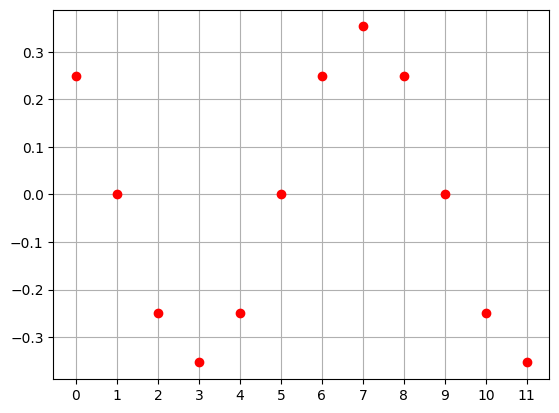

In [32]:
plt.plot(x,G2, 'ro')
plt.xticks(x)
plt.grid(True)
plt.show()